In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px

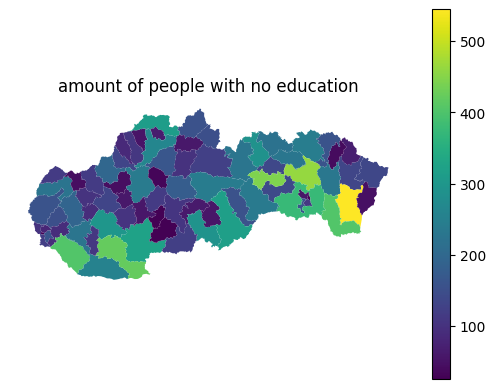

In [16]:
url = "https://bbrejova.github.io/viz/data/districts.json"
districts = gpd.read_file(url).rename(columns={'LAU1_CODE':'Kód okresu'}).set_index('Kód okresu')

table = pd.read_csv('data\RV_O_040_L_OK_SK.CSV', sep=';')
table = table[table["Vzdelanie"] == 'bez školského vzdelania – osoby vo veku 15 rokov a viac']
table = table[table["Súčasná ekonomická aktivita"] != 'žiak základnej školy'].groupby('Kód okresu')['abs.'].sum()
geotable = gpd.GeoDataFrame(table, geometry=districts['geometry'])

plot = geotable.plot(column = 'abs.', legend=True, legend_kwds={"orientation": "horizontal"})
plot.set_title("amount of people with no education")
plot.set_axis_off()

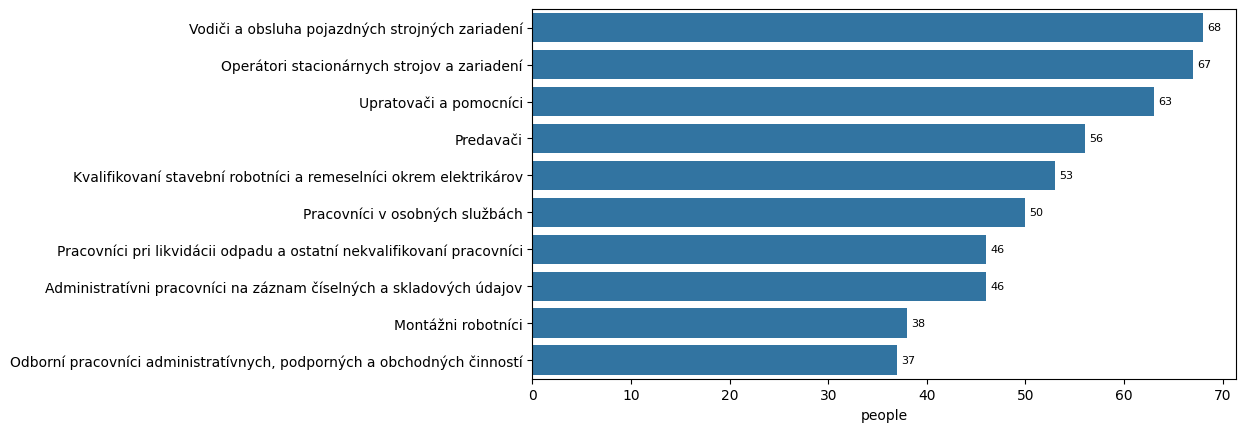

In [95]:
table = pd.read_csv('data\RV_O_067_R_SR_SK.CSV', sep=';')
table = pd.DataFrame(table.query("Vzdelanie == 'bez školského vzdelania – osoby vo veku 15 rokov a viac'")
         .groupby('Zamestnanie (ISCO - triedy)')['abs.'].sum().sort_values(ascending=False)).reset_index()
table = table[table['Zamestnanie (ISCO - triedy)']!='nezistené']
table = table[table['Zamestnanie (ISCO - triedy)']!='neaplikovateľné']

plot = sns.barplot(data=table.head(10), x='abs.', y='Zamestnanie (ISCO - triedy)')
plot.bar_label(plot.containers[0], fontsize=8, padding=3)
plot.set_xlabel('people')
plot.set_ylabel('')
plt.subplots_adjust(left=0.5, right=1.6)

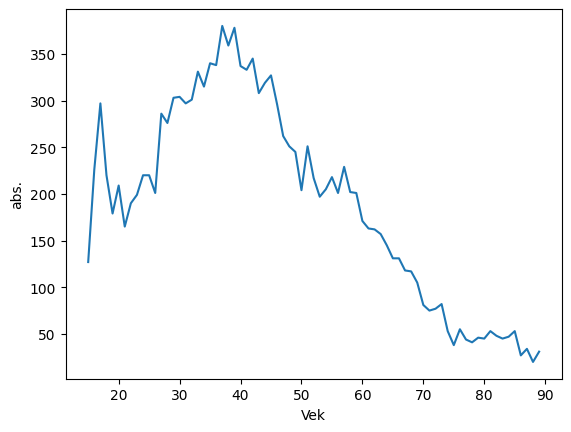

In [3]:
table = pd.read_csv('data\RV_O_040_R_SR_SK.CSV', sep=';')
table = table[table['Vzdelanie'] == 'bez školského vzdelania – osoby vo veku 15 rokov a viac']
table = table[table['Súčasná ekonomická aktivita'] != 'žiak základnej školy']
table = table[table['Vek'] != '90 a viac rokov']
table['Vek'] = table['Vek'].apply(int)
table = pd.DataFrame(table.groupby('Vek')['abs.'].sum()).reset_index()
plot = sns.lineplot(table, x='Vek', y='abs.')

In [94]:
#Učitelia a odborní pedagogickí pracovníci  ? ? ?
table = pd.read_csv('data\RV_O_067_L_OK_SK.CSV', sep=';')
table = table[table['Zamestnanie (ISCO - triedy)'] == 'Učitelia a odborní pedagogickí pracovníci']
table1 = table[table['Vzdelanie'] == 'bez školského vzdelania – osoby vo veku 15 rokov a viac']
display(table1)
table = pd.read_csv('data\RV_O_067_R_KR_SK.CSV', sep=';')
table = table[table['Zamestnanie (ISCO - triedy)'] == 'Učitelia a odborní pedagogickí pracovníci']
table1 = table[table['Vzdelanie'] == 'bez školského vzdelania – osoby vo veku 15 rokov a viac']
display(table1)

,Kód okresu,Názov okresu,Súčasná ekonomická aktivita,Odvetvie ekonomickej činnosti​ (NACE - sekcie),Zamestnanie (ISCO - triedy),Vzdelanie,abs.
7831,SK0102,Okres Bratislava II,pracujúci (okrem dôchodcov),Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
28152,SK0105,Okres Bratislava V,pracujúci (okrem dôchodcov),Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
59071,SK0211,Okres Dunajská Streda,osoba na rodičovskej dovolenke,Verejná správa a obrana; povinné sociálne zabe...,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
224403,SK031B,Okres Žilina,pracujúci (okrem dôchodcov),Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
346110,SK0423,Okres Košice II,pracujúci (okrem dôchodcov),Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1


12


,Kód štátu,Názov štátu,Kód oblasti,Kód kraja,Názov oblasti,Názov kraja,Súčasná ekonomická aktivita,Odvetvie ekonomickej činnosti​ (NACE - sekcie),Zamestnanie (ISCO - triedy),Vzdelanie,abs.
4823,SK0,Slovenská republika,SK01,SK010,Bratislavský kraj,Bratislavský kraj,pracujúci (okrem dôchodcov),"Odborné, vedecké a technické činnosti",Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
6214,SK0,Slovenská republika,SK01,SK010,Bratislavský kraj,Bratislavský kraj,pracujúci (okrem dôchodcov),Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,2
10920,SK0,Slovenská republika,SK01,SK010,Bratislavský kraj,Bratislavský kraj,pracujúci dôchodca,Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
24879,SK0,Slovenská republika,SK02,SK021,Západné Slovensko,Trnavský kraj,pracujúci dôchodca,Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
27452,SK0,Slovenská republika,SK02,SK021,Západné Slovensko,Trnavský kraj,osoba na rodičovskej dovolenke,Verejná správa a obrana; povinné sociálne zabe...,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
46190,SK0,Slovenská republika,SK02,SK023,Západné Slovensko,Nitriansky kraj,pracujúci (okrem dôchodcov),Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
59035,SK0,Slovenská republika,SK03,SK031,Stredné Slovensko,Žilinský kraj,pracujúci (okrem dôchodcov),Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,2
69013,SK0,Slovenská republika,SK03,SK032,Stredné Slovensko,Banskobystrický kraj,pracujúci (okrem dôchodcov),Veľkoobchod a maloobchod; oprava motorových vo...,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
70727,SK0,Slovenská republika,SK03,SK032,Stredné Slovensko,Banskobystrický kraj,pracujúci (okrem dôchodcov),Činnosti v oblasti nehnuteľností,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
72355,SK0,Slovenská republika,SK03,SK032,Stredné Slovensko,Banskobystrický kraj,pracujúci (okrem dôchodcov),Vzdelávanie,Učitelia a odborní pedagogickí pracovníci,bez školského vzdelania – osoby vo veku 15 rok...,1
